
# Local Volume

Seeking Milky Way or Local Group analogs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import axes3d
import random
import statistics as stats
from astropy.io import ascii

In [54]:
data = pd.read_csv("./tables/lvg.csv") 

In [160]:
data2 = pd.read_csv("./tables/lvg_table2_clean.csv") 

,GalaxyName,Coords,Diam,i,Amp_rot,internal_B_ext,absolute_B_ext,Avg_B_mu,log_ks_mag,log_m_holmberg,log_M_HI,vh,theta1,Disturber,theta5,thetaj
1129,Milky Way,174540.0-290028,NaN,NaN,NaN,NaN,-20.8,NaN,10.78,NaN,NaN,-65.0,2.8,Sag dSph,2.9,1.56


In [58]:
data['Morph_code'].unique()

array(['10', '9', '-3', '5', '8', '-1', '-2', '3', '7', '6', '0', '4',
       '1', '11', '2', nan, '6 1'], dtype=object)

,GalaxyName,Coords,Diameter_arcmin,aspect,B_extinct,FUV,B_mag,Halpha_mag,Kmag,21mag,W_50,Morph_code,Type,Surface_Morph,vh,Dist,Distance_method
1144,HIZOAJ1914+10,191502.5+101943,NaN,NaN,43.8,1,NaN,NaN,NaN,* 14.1,0 6,6 1,0 I,r,L 65,4 6.9,0 BTF


In [142]:
data = data[data['GalaxyName'] != 'HIZOA J1149-62']
data = data[data['GalaxyName'] != 'HIZOA J1914+10']

data['W_50'] = pd.to_numeric(data['W_50'])

In [143]:
spirals_bc = data[(data['Morph_code'] == '4')]

In [144]:
lvg = pd.merge(data,data2,on='GalaxyName')

,GalaxyName,Coords,Diameter_arcmin,aspect,B_extinct,FUV,B_mag,Halpha_mag,Kmag,21mag,W_50,Morph_code,Type,Surface_Morph,vh,Dist,Distance_method
13,NGC0024,000956.4-245748,7.24,0.22,0.08,14.2,12.4,16,9,13.5,213.0,5,NaN,NaN,550,7.31,TRGB
42,MESSIER031,004244.5+411609,190.55,0.33,0.27,8.8,4.3,9.6,1,6,510.0,3,NaN,NaN,-296,0.77,Cep
48,NGC0253,004734.3-251732,37.15,0.22,0.08,11.3,7.9,11.7,3.8,10.9,407.0,5,NaN,NaN,243,3.7,TRGB
93,NGC0628,013641.3+154712,11.22,0.94,0.3,12.2,9.8,13.5,6.8,11.5,53.0,5,NaN,NaN,657,10.19,TRGB
122,NGC0891,022232.8+422048,13.18,0.29,0.28,15.2,10.7,14.7,5.9,11.7,456.0,3,NaN,NaN,526,9.95,TRGB
140,Maffei2,024154.5+593611,3.80,0.50,4.78,NaN,14.8,17.3,4.5,11.1,306.0,4,NaN,NaN,-15,5.73,TRGB
150,Dw1,025656.1+585442,2.00,0.65,5.31,NaN,15.0,17.3,6.1*,11.7,187.0,3,NaN,NaN,112,6.25,NAM
289,NGC2683,085240.9+332502,13.49,0.24,0.14,14.4,10.3,14.7,6.3,12.9,428.0,3,NaN,NaN,380,9.82,TRGB
331,NGC2835,091752.9-222119,8.91,0.67,0.44,13.2,11.0,13.7,7.9,12.5,194.0,5,NaN,NaN,885,10.3,TF
348,NGC2903,093209.6+213002,12.59,0.48,0.13,12.6,9.5,13.2,6,12,366.0,4,NaN,NaN,556,8.87,BS


In [157]:
spirals_b_to_c = lvg[(lvg['Morph_code'] == '3')|(lvg['Morph_code'] == '4')|(lvg['Morph_code'] == '5')]

In [166]:
spirals_all = lvg[(lvg['Morph_code'] == '1') |(lvg['Morph_code'] == '2')|(lvg['Morph_code'] == '3')|(lvg['Morph_code'] == '4')|(lvg['Morph_code'] == '5')|(lvg['Morph_code'] == '6')|(lvg['Morph_code'] == '7')]

In [167]:
spirals_all.count()

GalaxyName         104
Coords_x           104
Diameter_arcmin    103
aspect             103
B_extinct          103
FUV                 87
B_mag              104
Halpha_mag          95
Kmag               104
21mag              101
W_50               102
Morph_code         104
Type                 2
Surface_Morph        0
vh_x               104
Dist               104
Distance_method    104
Coords_y           104
Diam               103
i                  103
Amp_rot            101
internal_B_ext     103
absolute_B_ext     104
Avg_B_mu           103
log_ks_mag         104
log_m_holmberg     101
log_M_HI           101
vh_y               104
theta1             104
Disturber          104
theta5             104
thetaj              91
dtype: int64

In [170]:
spirals_all  = spirals_all[spirals_all['Amp_rot'].notnull()]
spirals_all

,GalaxyName,Coords_x,Diameter_arcmin,aspect,B_extinct,FUV,B_mag,Halpha_mag,Kmag,21mag,...,absolute_B_ext,Avg_B_mu,log_ks_mag,log_m_holmberg,log_M_HI,vh_y,theta1,Disturber,theta5,thetaj
13,NGC0024,000956.4-245748,7.24,0.22,0.08,14.2,12.4,16,9,13.5,...,-17.7,24.5,9.48,10.19,8.64,606.0,-1.2,NGC0045,-1,0.07
42,MESSIER031,004244.5+411609,190.55,0.33,0.27,8.8,4.3,9.6,1,6,...,-21.4,23.1,10.73,11.50,9.73,-29.0,3.1,MESSIER032,3.2,1.42
46,NGC0247,004708.3-204536,25.12,0.32,0.08,11.5,9.9,13.3,7.4,10.7,...,-18.6,24.9,9.5,10.45,9.18,216.0,1.6,NGC0253,1.6,1.73
48,NGC0253,004734.3-251732,37.15,0.22,0.08,11.3,7.9,11.7,3.8,10.9,...,-21.2,23.1,10.98,11.22,9.09,276.0,0.1,NGC0247,0.2,0.66
59,NGC0300,005453.5-374057,25.70,0.71,0.06,10.3,9.0,12.5,6.4,9.1,...,-17.9,24.4,9.41,10.17,9.32,116.0,0.1,NGC0055,0.2,0.23
89,MESSIER033,013350.8+303937,69.18,0.61,0.18,8.2,6.3,9.8,4.1,7.2,...,-19,23.7,9.62,10.34,9.4,34.0,1.5,MESSIER031,1.5,1.73
93,NGC0628,013641.3+154712,11.22,0.94,0.3,12.2,9.8,13.5,6.8,11.5,...,-20.6,23.5,10.6,10.22,9.73,827.0,-0.3,UGC01171,-0.2,-0.54
107,NGC0672,014753.2+272601,7.24,0.36,0.34,13.9,11.3,15.3,8.5,12.1,...,-18.8,23.5,9.65,10.22,9.22,626.0,0.2,IC1727,0.3,0.24
108,UGC01281,014932.3+323533,5.62,0.18,0.2,15.5,12.9,17.5,10.5,13.8,...,-16.2,24.7,8.57,9.45,8.28,367.0,-1.1,Maffei2,-0.7,-0.55
122,NGC0891,022232.8+422048,13.18,0.29,0.28,15.2,10.7,14.7,5.9,11.7,...,-20.6,23.7,10.98,11.33,9.66,736.0,0.3,[TT2009] 25,0.6,-0.07


In [198]:
mw_analogs = spirals_all[(spirals_all['Amp_rot'] > 200) & (spirals_all['Amp_rot'] < 300)]
mw_analogs = mw_analogs.reset_index()

In [211]:
list(mw_analogs.columns)
#mw_analogs

['index',
 'GalaxyName',
 'Coords_x',
 'Diameter_arcmin',
 'aspect',
 'B_extinct',
 'FUV',
 'B_mag',
 'Halpha_mag',
 'Kmag',
 '21mag',
 'W_50',
 'Morph_code',
 'Type',
 'Surface_Morph',
 'vh_x',
 'Dist',
 'Distance_method',
 'Coords_y',
 'Diam',
 'i',
 'Amp_rot',
 'internal_B_ext',
 'absolute_B_ext',
 'Avg_B_mu',
 'log_ks_mag',
 'log_m_holmberg',
 'log_M_HI',
 'vh_y',
 'theta1',
 'Disturber',
 'theta5',
 'thetaj']

In [226]:
analog_dist = []
analog_N = []
for i in range(len(mw_analogs)):
    #print(i)
    #print('Host:',mw_analogs['GalaxyName'][i],mw_analogs['Dist'][i])
    count = 0
    distance = mw_analogs['Dist'][i]
    for j in range(len(lvg)):
        if(lvg['Disturber'][j] == mw_analogs['GalaxyName'][i]):
            #print(lvg['GalaxyName'][j],lvg['log_M_HI'][j])
            count = count+1
    analog_dist.append(distance)
    analog_N.append(count)
    print(analog_dist,analog_N)

['0.77'] [60]
['0.77', '9.95'] [60, 12]
['0.77', '9.95', '9.82'] [60, 12, 17]
['0.77', '9.95', '9.82', '7.48'] [60, 12, 17, 2]
['0.77', '9.95', '9.82', '7.48', '3.7'] [60, 12, 17, 2, 55]
['0.77', '9.95', '9.82', '7.48', '3.7', '10.42'] [60, 12, 17, 2, 55, 31]
['0.77', '9.95', '9.82', '7.48', '3.7', '10.42', '10.7'] [60, 12, 17, 2, 55, 31, 7]
['0.77', '9.95', '9.82', '7.48', '3.7', '10.42', '10.7', '7.66'] [60, 12, 17, 2, 55, 31, 7, 35]
['0.77', '9.95', '9.82', '7.48', '3.7', '10.42', '10.7', '7.66', '9.04'] [60, 12, 17, 2, 55, 31, 7, 35, 18]
['0.77', '9.95', '9.82', '7.48', '3.7', '10.42', '10.7', '7.66', '9.04', '4.9'] [60, 12, 17, 2, 55, 31, 7, 35, 18, 60]


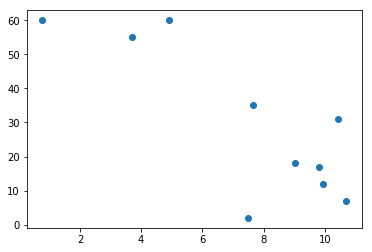

In [231]:
plt.scatter(pd.to_numeric(analog_dist),pd.to_numeric(analog_N))

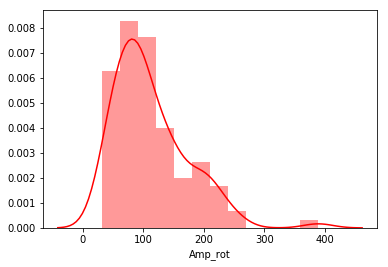

In [171]:
sb.distplot(spirals_all['Amp_rot'],color="red")
